# Group Project Proposal: Maternal Health Risk Classification

Members: Ruby Liu, Yu Wei Chen, Annabel Lim, Heather Jia

### Introduction

placeholder text

### Preliminary Exploratory Data Analysis

In [2]:
# load libraries 
library(tidyverse)
library(tidymodels)

# set seed value
set.seed(5);

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
# data set url
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv"

# read data 
maternity_data <- read_csv(url) |>
    mutate(RiskLevel = as_factor(RiskLevel))
maternity_data

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
29,90,70,8.00,100,80,high risk
30,140,85,7.00,98,70,high risk
35,120,60,6.10,98,76,low risk
23,140,80,7.01,98,70,high risk
23,130,70,7.01,98,78,mid risk
35,85,60,11.00,102,86,high risk
32,120,90,6.90,98,70,mid risk


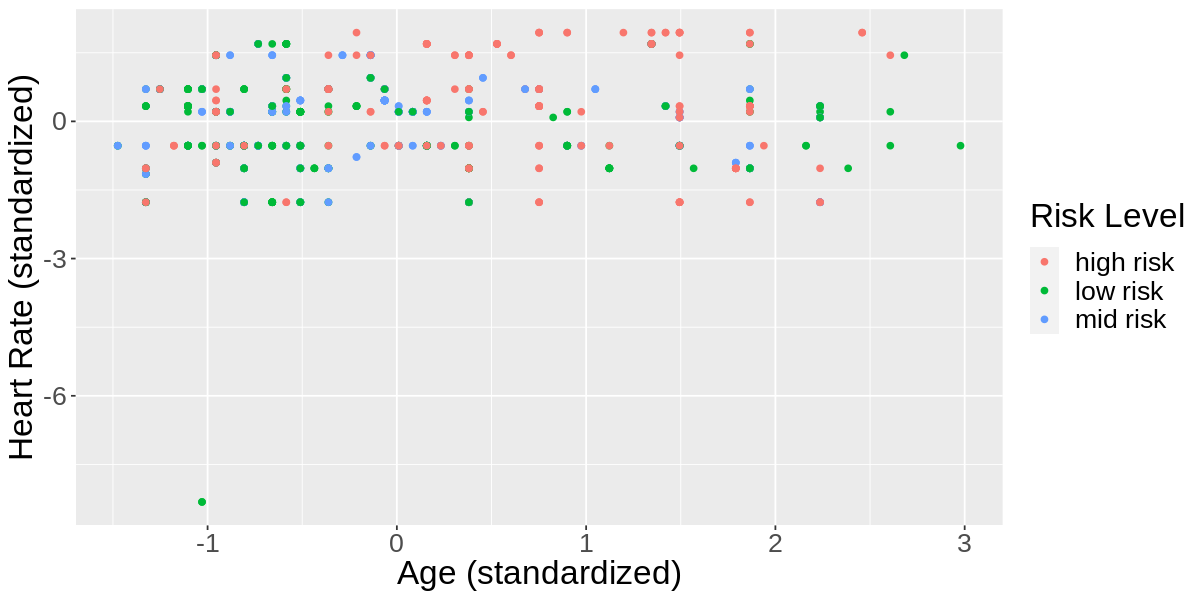

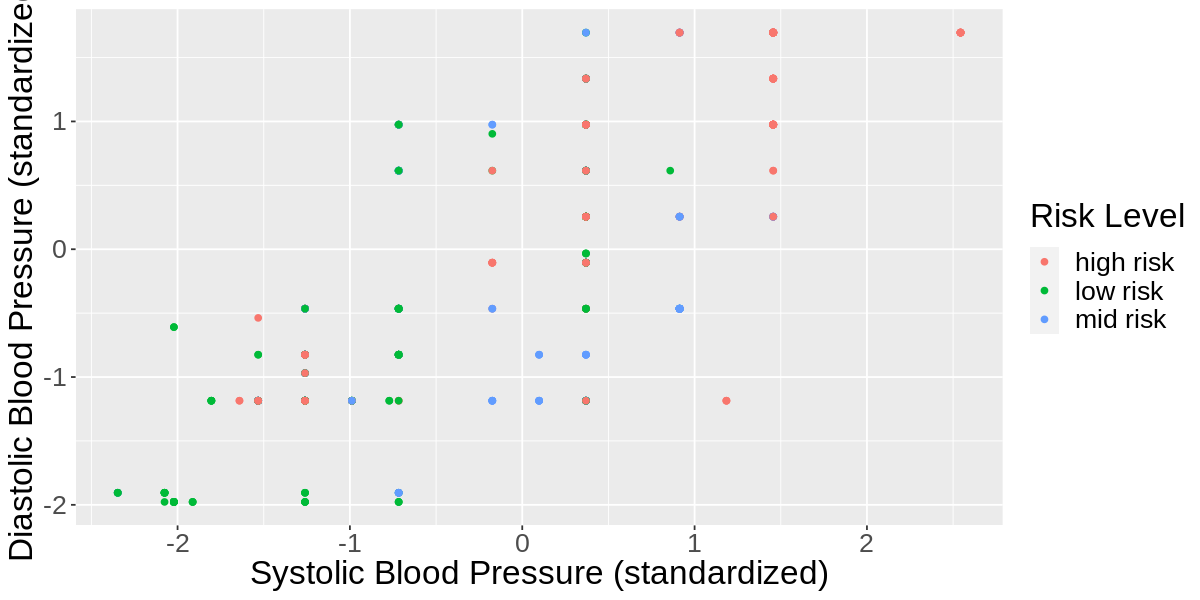

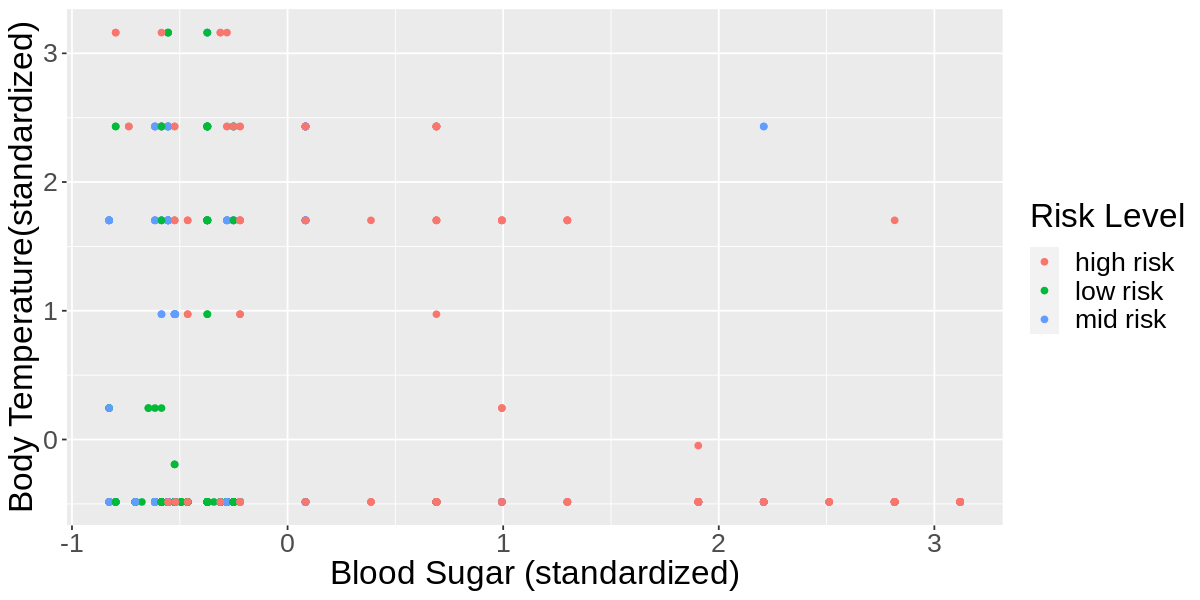

In [4]:
### this is just pre-preliminary visualizing to get a feel of the data... we can delete for actual proposal stuff

# scaling the data
maternity_data_scaled <- maternity_data |> 
    mutate(scaled_Age = scale(Age, center = TRUE),
           scaled_SystolicBP = scale(SystolicBP, center = TRUE),
           scaled_DiastolicBP = scale(DiastolicBP, center = TRUE),
           scaled_BS = scale(BS, center = TRUE),
           scaled_BodyTemp = scale(BodyTemp, center = TRUE),
           scaled_HeartRate = scale(HeartRate, center = TRUE))

options(repr.plot.width = 10, repr.plot.height = 5)

# plotting age versus heart rate
maternity_plot_age_heartrate <- maternity_data_scaled |>
    ggplot(aes(x = scaled_Age, y = scaled_HeartRate, colour = RiskLevel)) +
        geom_point() +
        labs(x = "Age (standardized)", y = "Heart Rate (standardized)", colour = "Risk Level") +
        theme(text = element_text(size = 20))
maternity_plot_age_heartrate

# plotting systolic blood pressure versus diastolic blood pressure
maternity_plot_systolicbp_diastolicbp <- maternity_data_scaled |>
    ggplot(aes(x = scaled_SystolicBP, y = scaled_DiastolicBP, colour = RiskLevel)) +
        geom_point() +
        labs(x = "Systolic Blood Pressure (standardized)", y = "Diastolic Blood Pressure (standardized)", colour = "Risk Level") +
        theme(text = element_text(size = 20))
maternity_plot_systolicbp_diastolicbp

# plotting systolic blood pressure versus diastolic blood pressure
maternity_plot_bs_bodytemp <- maternity_data_scaled |>
    ggplot(aes(x = scaled_BS, y = scaled_BodyTemp, colour = RiskLevel)) +
        geom_point() +
        labs(x = "Blood Sugar (standardized)", y = "Body Temperature(standardized)", colour = "Risk Level") +
        theme(text = element_text(size = 20))
maternity_plot_bs_bodytemp



In [12]:
# keep predictors: Age, Systolic Blood Pressure, Diastolic Blood Pressure, Blood Sugar
# target variable: Risk Factor 

maternity_selected <- maternity_data |>
                    select(Age, DiastolicBP, SystolicBP, BS, RiskLevel)

head(maternity_selected)

Age,DiastolicBP,SystolicBP,BS,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
25,80,130,15.00,high risk
35,90,140,13.00,high risk
29,70,90,8.00,high risk
30,85,140,7.00,high risk
35,60,120,6.10,low risk
23,80,140,7.01,high risk


In [13]:
# split data by 75% training, 25% testing 
maternity_split <- initial_split(maternity_selected, prop = 0.75, strata = RiskLevel) 

# training set 
maternity_train <- training(maternity_split)

# testing set
maternity_test <- testing(maternity_split)

head(maternity_train)
head(maternity_test)

Age,DiastolicBP,SystolicBP,BS,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
25,80,130,15,high risk
35,90,140,13,high risk
30,85,140,7,high risk
35,60,85,11,high risk
42,80,130,18,high risk
50,90,140,15,high risk


Age,DiastolicBP,SystolicBP,BS,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
29,70,90,8.00,high risk
23,80,140,7.01,high risk
10,50,70,6.90,low risk
40,100,140,18.00,high risk
22,65,100,7.20,low risk
49,90,120,7.20,low risk


In [66]:
# find proportions of labels
maternity_proportions <- maternity_train |>
                      group_by(RiskLevel) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(maternity_train))

maternity_proportions

# find mean of each predictor
maternity_predictor_means <- maternity_train |>
                        select(- RiskLevel) |>
                        map_df(mean)
maternity_predictor_means

RiskLevel,n,percent
<fct>,<int>,<dbl>
high risk,204,26.84211
low risk,304,40.00000
mid risk,252,33.15789


Age,DiastolicBP,SystolicBP,BS
<dbl>,<dbl>,<dbl>,<dbl>
30.08553,77.01974,114.2092,8.768066


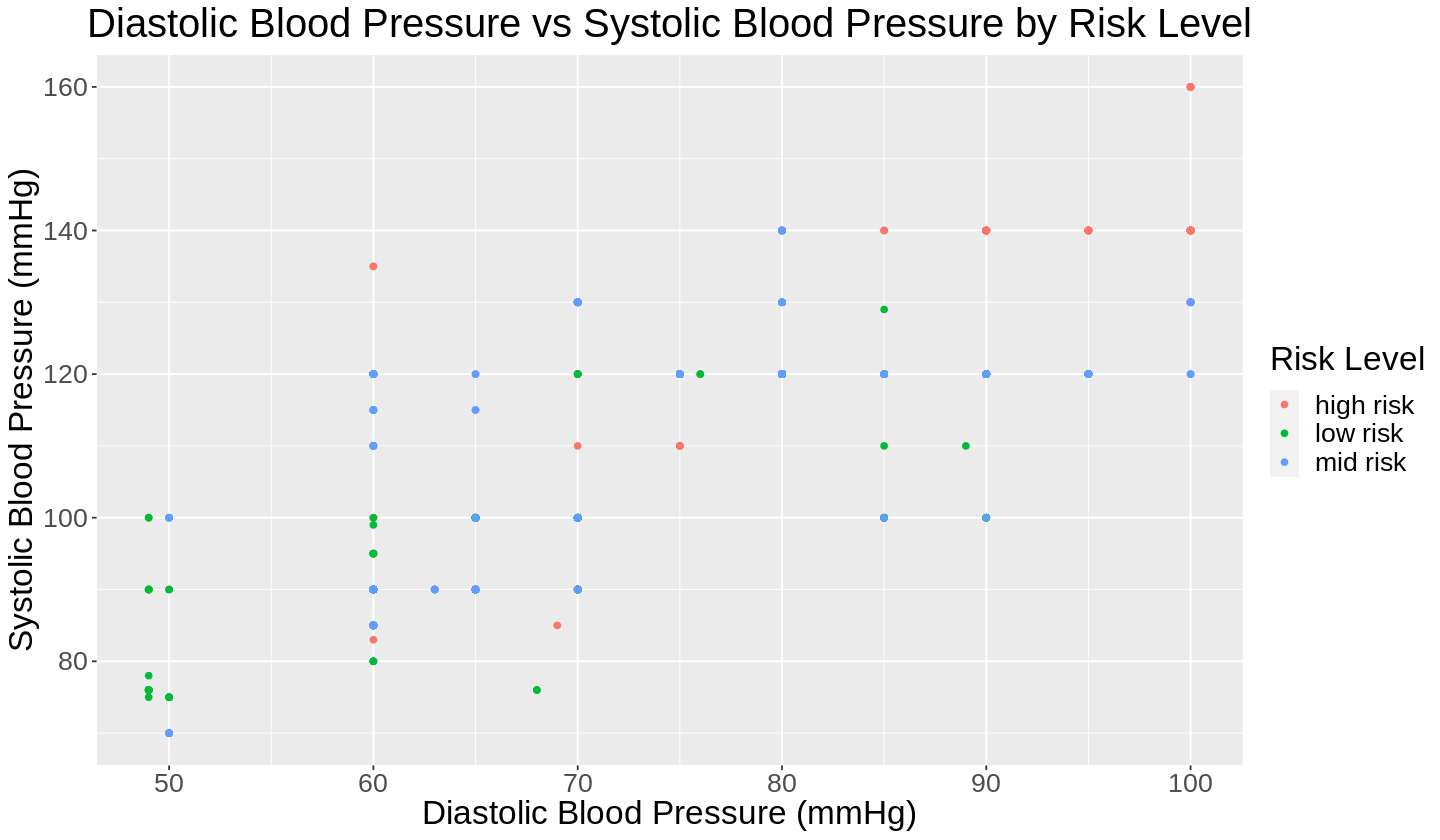

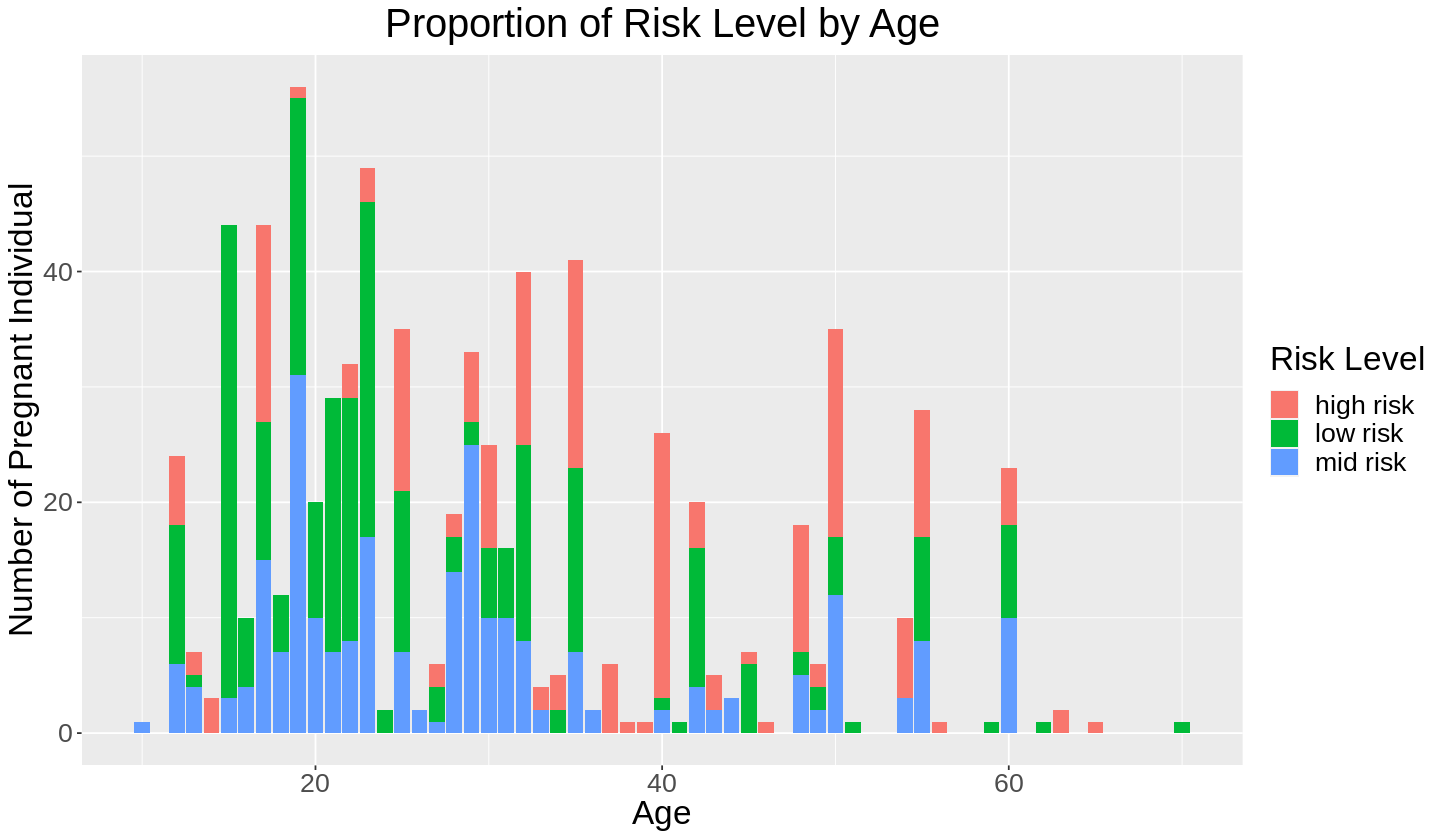

In [68]:
options(repr.plot.width = 12, repr.plot.height = 7)

# plot diastolic BP vs systolic BP, color by risk level
maternity_diastolic_vs_systolic <- maternity_train |>
                        ggplot(aes(x = DiastolicBP, y = SystolicBP, color = RiskLevel)) +
                        geom_point() +
                        labs (x = "Diastolic Blood Pressure (mmHg)", y = "Systolic Blood Pressure (mmHg)", color = "Risk Level") +
                        ggtitle("Diastolic Blood Pressure vs Systolic Blood Pressure by Risk Level") +
                        theme(text = element_text(size=20)) +
                        theme(plot.title = element_text(hjust = 0.5))


maternity_diastolic_vs_systolic

# plot proportion of risk level based on age 
maternity_age_vs_risk <- maternity_train |>
                        ggplot(aes(x = Age, fill = RiskLevel)) +
                        geom_bar() +
                        labs(x = "Age", y = "Number of Pregnant Individual", fill = "Risk Level") +
                        ggtitle("Proportion of Risk Level by Age") +
                        theme(text = element_text(size=20)) +
                        theme(plot.title = element_text(hjust = 0.5))

maternity_age_vs_risk

### Methods

placeholder text

### Expected Outcomes and Significance

placeholder text